<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Data-Science/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

Apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

<Axes: >

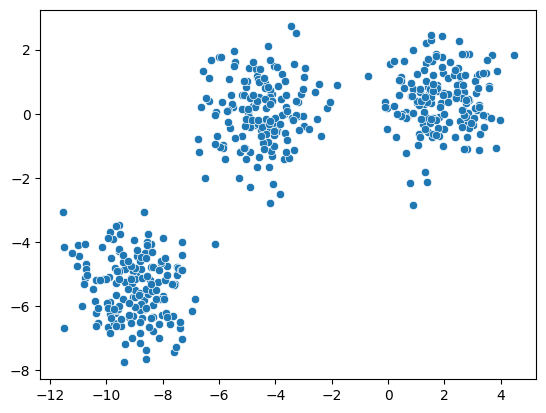

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1])

Now, it's your turn to create a synthetic dataset of 3 dimensions consisting of three clusters. You will also need to visualize this data using a 3-D plot. You can use any suitable library.

In [ ]:
# TODO: Create a 3 feature dataset generated using 3 clusters and plot it.
n_samples = 500
random_state = 170

X3d, y3d = make_blobs(n_samples=n_samples, n_features=3,
                  centers=3, random_state=random_state)

#google how to visualize 3 visualization

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [ ]:
predicted_clusters = 6 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [ ]:
km

KMeans(max_iter=100, n_clusters=6, random_state=42)

In [ ]:
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

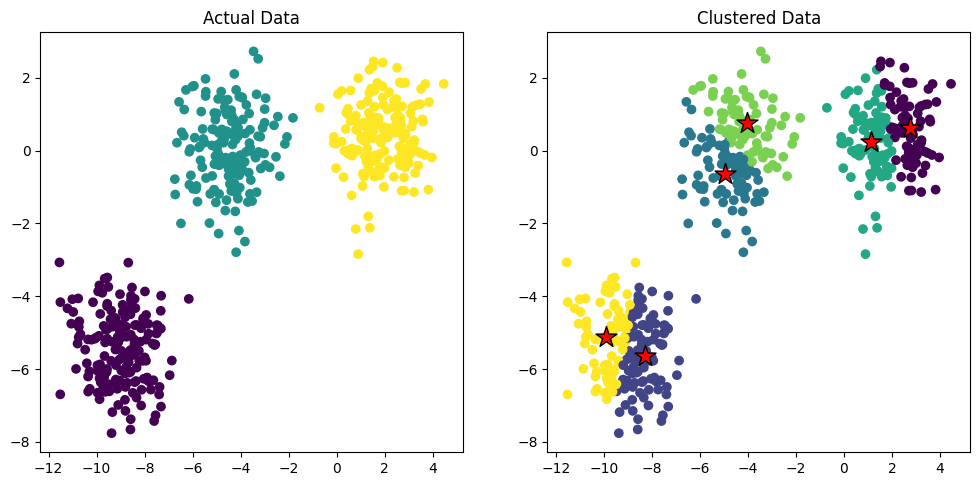

In [ ]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [ ]:
km.inertia_

630.4466947525708

In [ ]:
silhouette_score(X, y_pred)

0.32909060400489176

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

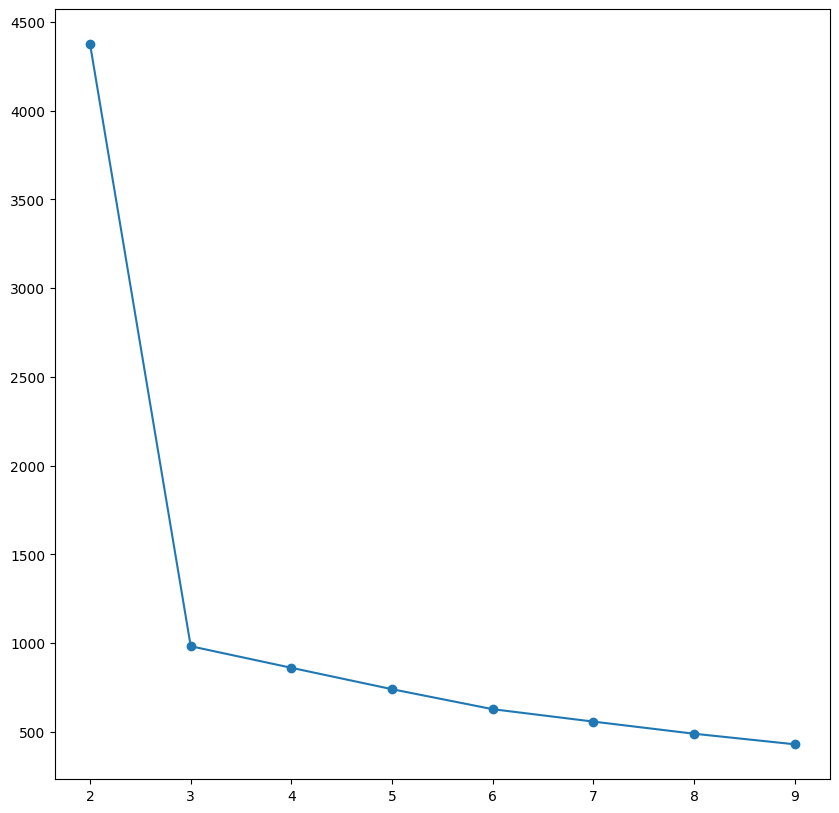

In [ ]:
plt.figure(figsize=(10, 10))

WCSS = []

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)

  WCSS.append(km.inertia_)
  # plt.subplot(5, 2, i)
  # plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  # plt.title("k = " + str(k))
  i = i + 1

plt.plot(range(2,10),WCSS,marker='o')
# print(WCSS)
plt.show()


Now, try to find the WCSS and Silhouette width for each value of k and plot them. Which seems to be the best value for k?

In [ ]:
# TODO: Code what is stated above. not done

# Working with the California Housing Dataset

Download the California housing dataset

In [ ]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/housing_clustering.csv")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


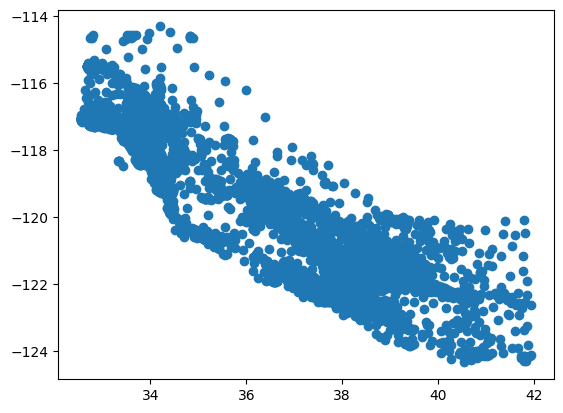

In [ ]:
#TODO: Make a scatter plot of latitude and longitude
X = housing['latitude']
Y = housing['longitude']
plt.scatter(X,Y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


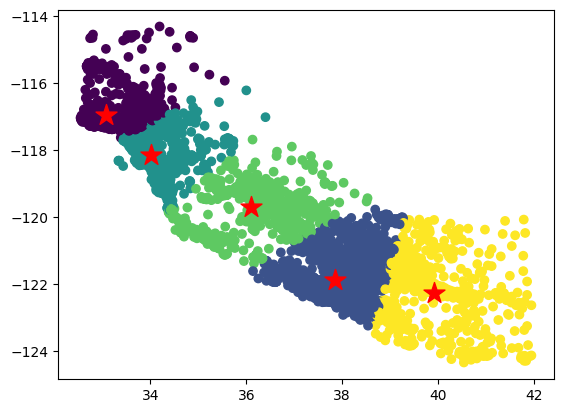

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a KMeans instance with the desired number of clusters
km = KMeans(n_clusters=5)

X = housing[['latitude', 'longitude']]
y_pred = km.fit_predict(X)

plt.scatter(X['latitude'], X['longitude'], c=y_pred)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=250, marker='*')

# The rest of your code for visualization or analysis


In [ ]:
#TODO: Using WCSS or Silhouette Width, find best value of K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

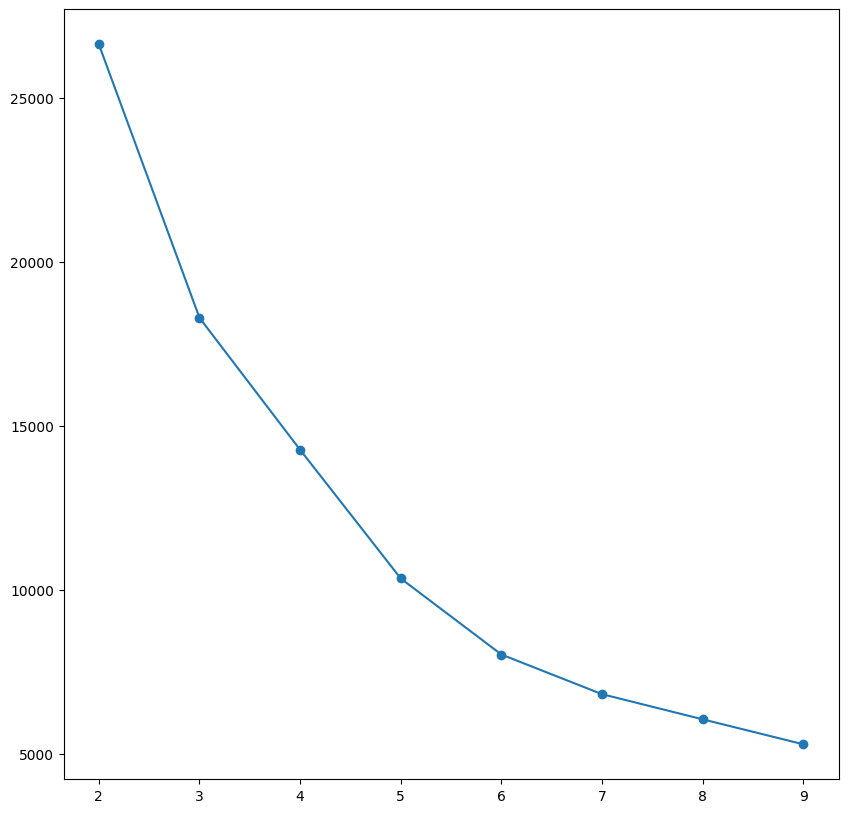

In [ ]:
plt.figure(figsize=(10, 10))

WCSS = []

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)

  WCSS.append(km.inertia_)
  i = i + 1

plt.plot(range(2,10),WCSS,marker='o')
# print(WCSS)
plt.show()

## Working with US Arrests Data and Pipelines

Let's read the USArrests data that can be downloaded from:

https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv


In [ ]:
# TODO: Read in the file to a dataframe and ensure everything is loaded properly
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)

In [ ]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


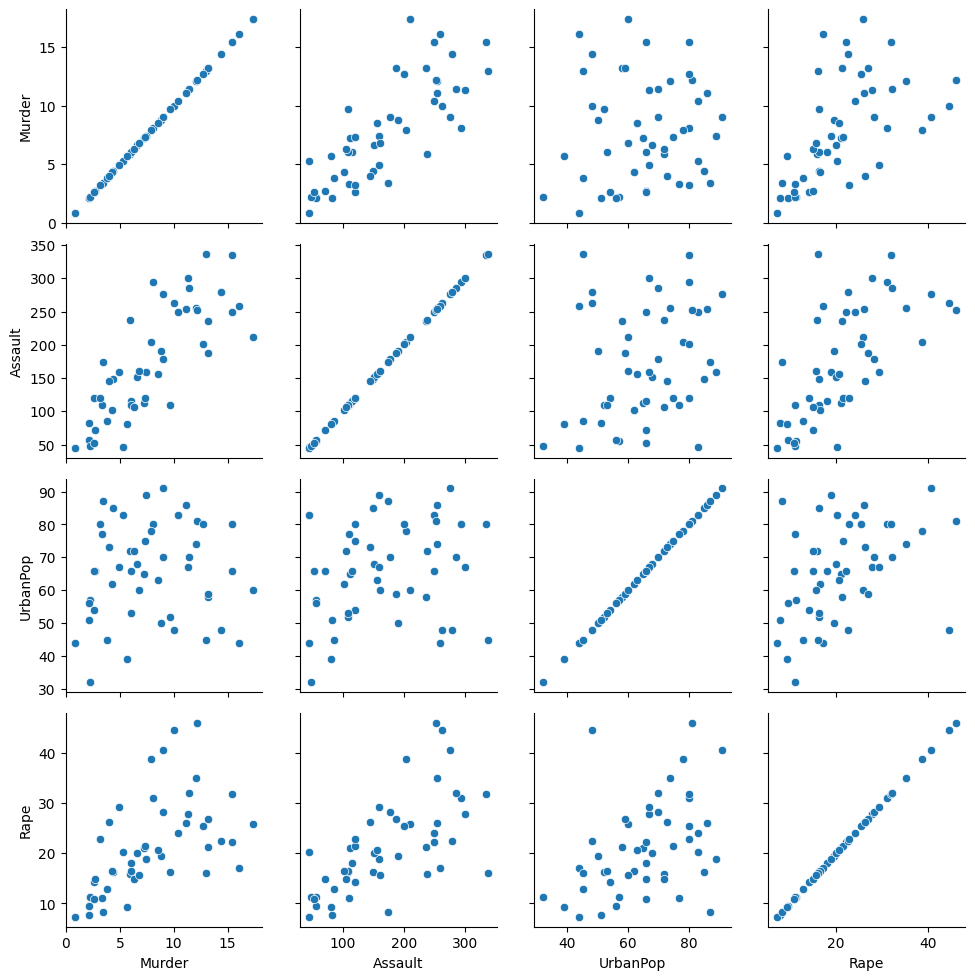

In [ ]:
# TODO: Create a pairwise scatter plot and visualize relationships between variables
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships

g = sns.PairGrid(arrests)
g.map(sns.scatterplot)

In [ ]:
# TODO: Let's create a pipeline of scaler and then k-means and use it on the dataset
kmeansPipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("kmeans", KMeans(n_clusters=4, max_iter=500)),
    ]
)

In [ ]:
arrests["label"] = kmeansPipeline["kmeans"].labels_

In [ ]:
# TODO: apply the pipeline on the data

In [ ]:
arrests

,Murder,Assault,UrbanPop,Rape,label
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


In [ ]:
arrests.sort_values("label")

,Murder,Assault,UrbanPop,Rape,label
Alabama,13.2,236,58,21.2,0
Mississippi,16.1,259,44,17.1,0
North Carolina,13.0,337,45,16.1,0
Georgia,17.4,211,60,25.8,0
South Carolina,14.4,279,48,22.5,0
Louisiana,15.4,249,66,22.2,0
Arkansas,8.8,190,50,19.5,0
Tennessee,13.2,188,59,26.9,0
Utah,3.2,120,80,22.9,1
Rhode Island,3.4,174,87,8.3,1


In [ ]:
# TODO: try various values of k and check which value of k may be the best

In [ ]:
kma = kmeansPipeline.fit_transform(arrests)
kma

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.08873975, 0.62726225, 0.46378946, 0.83046863],
       [0.65273819, 0.93976256, 0.55980288, 1.11806973],
       [0.64245525, 0.6437089 , 0.22424756, 1.03851489],
       [0.3687697 , 0.48022514, 0.622391  , 0.52998277],
       [0.8632452 , 0.81437904, 0.34249026, 1.24006126],
       [0.72053932, 0.58121684, 0.29269843, 0.95627678],
       [0.91997542, 0.26856445, 0.8865109 , 0.43721032],
       [0.59289165, 0.34985605, 0.54649402, 0.6634875 ],
       [0.61406335, 0.95987199, 0.39069254, 1.326807  ],
       [0.28295894, 0.80603986, 0.54092962, 1.01923344],
       [0.98770564, 0.35621617, 0.87248774, 0.58359759],
       [0.82490048, 0.40689866, 0.91987917, 0.16608959],
       [0.54406108, 0.515755  , 0.26822812, 0.93628495],
       [0.63350086, 0.20594894, 0.65264643, 0.40114116],
       [0.99204163, 0.49303085, 1.08107512, 0.14334073],
       [0.68815782, 0.15917634, 0.71046164, 0.33885682],
       [0.54411132, 0.45976522, 0.78660308, 0.39657181],
       [0.22720908, 0.71581523,

In [ ]:
kmeansPipeline["kmeans"].cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [ ]:
# TODO: I would like to see which states belong to which cluster. Output that data in a suitable format.

In [ ]:
#TODO: I would like to live in a state that is different in crime from TX. What choices do I have? Which states have lowest crime profiles?